In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import confusion_matrix

#### load in data

In [9]:
dataset_path = "./dataset/plant_health_data.csv"
df = pd.read_csv(dataset_path)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1200 non-null   object 
 1   Plant_ID                1200 non-null   int64  
 2   Soil_Moisture           1200 non-null   float64
 3   Ambient_Temperature     1200 non-null   float64
 4   Soil_Temperature        1200 non-null   float64
 5   Humidity                1200 non-null   float64
 6   Light_Intensity         1200 non-null   float64
 7   Soil_pH                 1200 non-null   float64
 8   Nitrogen_Level          1200 non-null   float64
 9   Phosphorus_Level        1200 non-null   float64
 10  Potassium_Level         1200 non-null   float64
 11  Chlorophyll_Content     1200 non-null   float64
 12  Electrochemical_Signal  1200 non-null   float64
 13  Plant_Health_Status     1200 non-null   object 
dtypes: float64(11), int64(1), object(2)
memo

Assume that all plants are equal and the health status of the plants are independent of time - they are affected only by the snapshot of the environmental details as shown in each row.

In [16]:
df.drop(['Timestamp', 'Plant_ID'], axis = 1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Soil_Moisture           1200 non-null   float64
 1   Ambient_Temperature     1200 non-null   float64
 2   Soil_Temperature        1200 non-null   float64
 3   Humidity                1200 non-null   float64
 4   Light_Intensity         1200 non-null   float64
 5   Soil_pH                 1200 non-null   float64
 6   Nitrogen_Level          1200 non-null   float64
 7   Phosphorus_Level        1200 non-null   float64
 8   Potassium_Level         1200 non-null   float64
 9   Chlorophyll_Content     1200 non-null   float64
 10  Electrochemical_Signal  1200 non-null   float64
 11  Plant_Health_Status     1200 non-null   object 
dtypes: float64(11), object(1)
memory usage: 112.6+ KB


The dependent variables are the 11 float features

#### data cleaning

1. data types (correct)
2. missing values
3. duplicate values
4. outliers
5. correlation

Look at missing data, if any. As seen below, there's no missing values

In [19]:
df.isna().sum()

Soil_Moisture             0
Ambient_Temperature       0
Soil_Temperature          0
Humidity                  0
Light_Intensity           0
Soil_pH                   0
Nitrogen_Level            0
Phosphorus_Level          0
Potassium_Level           0
Chlorophyll_Content       0
Electrochemical_Signal    0
Plant_Health_Status       0
dtype: int64

Check for any duplicates. As seen below, there's no duplicated values

In [22]:
df.duplicated().sum()

0

Check for outliers by looking at distribution. Seems ok (both features & target variable).

In [34]:
df.describe()

Soil_Moisture  Ambient_Temperature  Soil_Temperature     Humidity  \
count    1200.000000          1200.000000       1200.000000  1200.000000   
mean       25.106918            23.999130         19.957794    54.853165   
std         8.677725             3.441561          2.932073     8.784916   
min        10.000724            18.001993         15.003710    40.028758   
25%        17.131893            21.101766         17.353027    47.019694   
50%        25.168333            23.889044         19.911473    54.692069   
75%        32.370231            27.042634         22.596851    62.451053   
max        39.993164            29.990886         24.995929    69.968871   

       Light_Intensity      Soil_pH  Nitrogen_Level  Phosphorus_Level  \
count      1200.000000  1200.000000     1200.000000       1200.000000   
mean        612.637265     6.524102       30.106751         30.264484   
std         228.318853     0.581755       11.514396         11.466846   
min         200.615482     5.507392       10.003650         10.017690   
25%         416.878983     6.026042       20.249774         20.894445   
50%         617.240221     6.540524       30.138590         30.019385   
75%         811.474690     7.030039       40.184737         40.131459   
max         999.856262     7.497823       49.951136         49.980700   

       Potassium_Level  Chlorophyll_Content  Electrochemical_Signal  
count      1200.000000          1200.000000             1200.000000  
mean         30.112088            34.749591                0.987764  
std          11.668085             8.766995                0.575116  
min          10.000606            20.025511                0.002376  
25%          19.585561            27.463350                0.487982  
50%          30.495054            34.433427                0.981647  
75%          40.108296            42.232637                1.473142  
max          49.981945            49.990811                1.996116

In [94]:
df['Plant_Health_Status'].value_counts()

Plant_Health_Status
High Stress        500
Moderate Stress    401
Healthy            299
Name: count, dtype: int64

The dependent features are not correlated with each other. Quite surprising as I'd expect ambient and soil temperatures to affect each other, and perhaps also be affected by light intensity.

<Axes: >

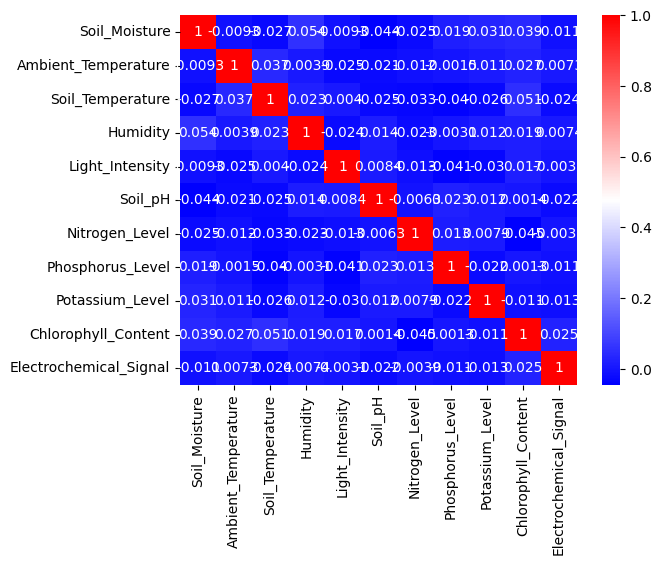

In [ ]:
sns.heatmap(df.drop('Plant_Health_Status', axis=1).corr(), cmap="bwr", annot=True)

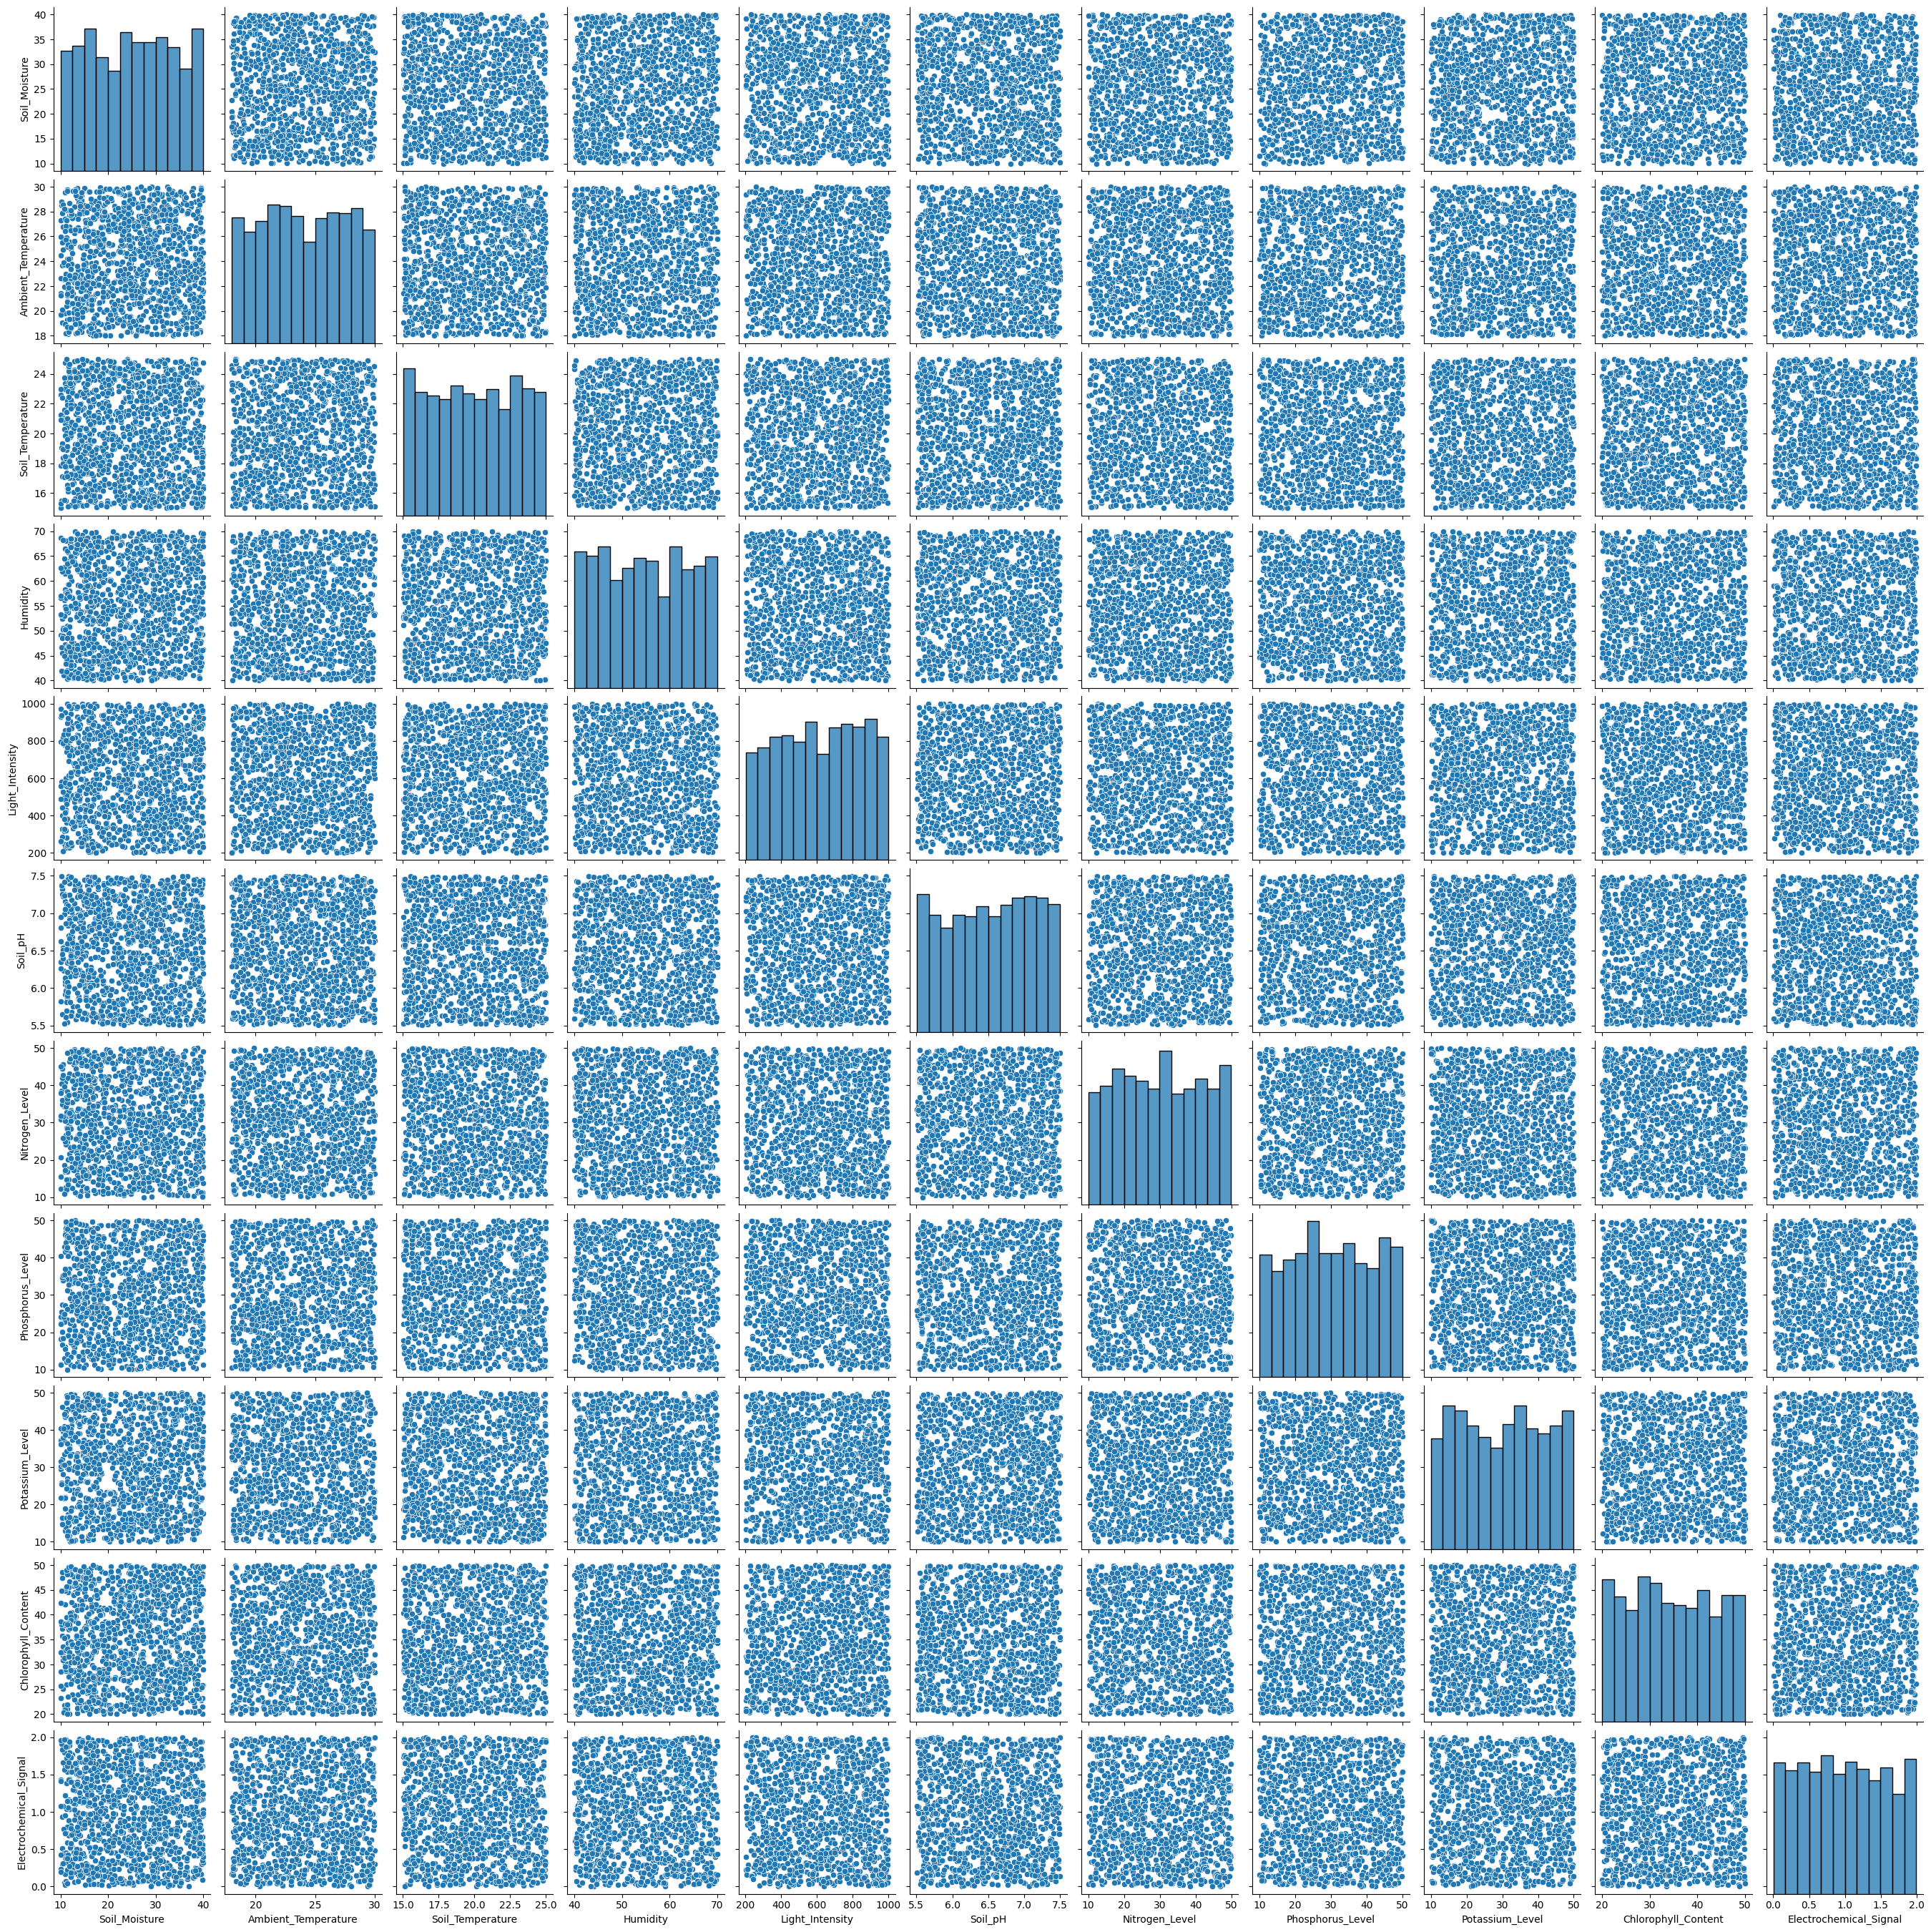

In [95]:
sns.pairplot(df)

#### Modelling

In [102]:
X = df.drop('Plant_Health_Status', axis = 1)
y = df['Plant_Health_Status']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [104]:
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

In [105]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [106]:
pipe.score(X_test, y_test)

0.77

In [132]:
y_pred = pipe.predict(X_test)

Text(0.5, 36.72222222222221, 'Predicted Label')

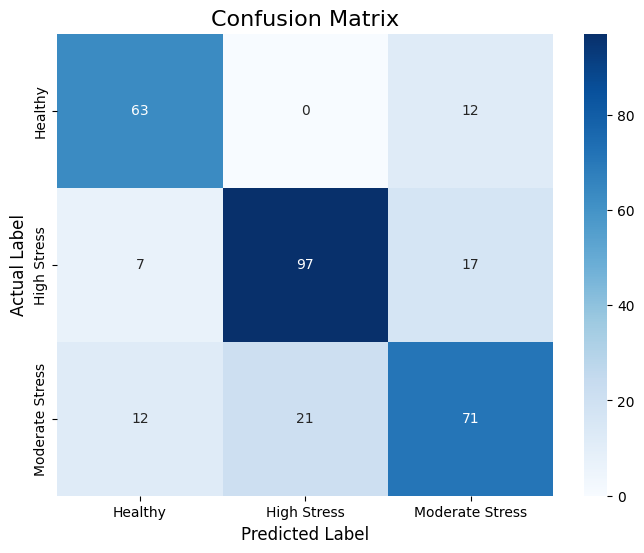

In [133]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'High Stress', 'Moderate Stress'], 
            yticklabels=['Healthy', 'High Stress', 'Moderate Stress'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

For the decision tree, we obtain very high accuracy, worried about overfitting

In [116]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9933333333333333

In [117]:
y_pred = clf.predict(X_test)

Text(0.5, 36.72222222222221, 'Predicted Label')

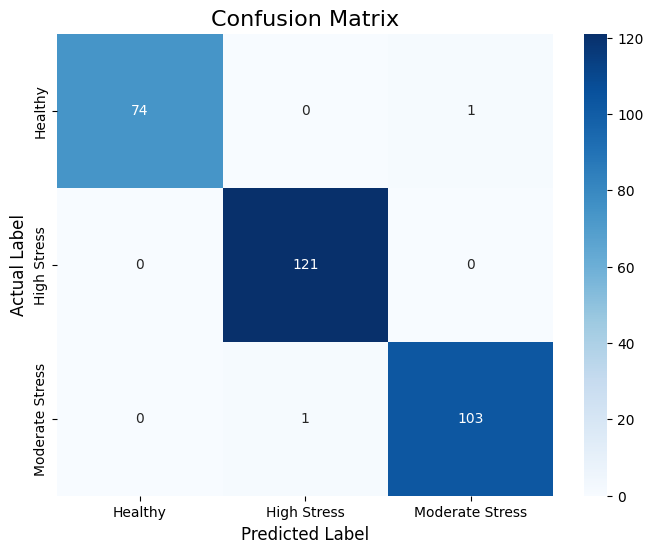

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'High Stress', 'Moderate Stress'], 
            yticklabels=['Healthy', 'High Stress', 'Moderate Stress'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

In [129]:
y_test.value_counts()

Plant_Health_Status
High Stress        121
Moderate Stress    104
Healthy             75
Name: count, dtype: int64

###### xtra: try diff hyperparams

In [111]:
clf.get_depth()

4

In [112]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [113]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9333333333333333

###### xtra stuff: scaling in action

In [84]:
scale = StandardScaler()

In [86]:
X_train = df.drop('Plant_Health_Status', axis = 1)

In [88]:
transformed = pd.DataFrame(scale.fit_transform(X_train))

In [89]:
transformed.describe()

0             1             2             3             4   \
count  1.200000e+03  1.200000e+03  1.200000e+03  1.200000e+03  1.200000e+03   
mean   9.621933e-17 -1.190159e-15 -6.661338e-16  1.184238e-16  4.544513e-16   
std    1.000417e+00  1.000417e+00  1.000417e+00  1.000417e+00  1.000417e+00   
min   -1.741527e+00 -1.743290e+00 -1.690323e+00 -1.688188e+00 -1.805342e+00   
25%   -9.194057e-01 -8.422260e-01 -8.887411e-01 -8.920674e-01 -8.577474e-01   
50%    7.080265e-03 -3.200058e-02 -1.580473e-02 -1.834545e-02  2.016862e-02   
75%    8.373555e-01  8.847068e-01  9.004404e-01  8.652395e-01  8.712392e-01   
max    1.716170e+00  1.741725e+00  1.719001e+00  1.721361e+00  1.696664e+00   

                 5             6             7             8             9   \
count  1.200000e+03  1.200000e+03  1.200000e+03  1.200000e+03  1.200000e+03   
mean  -6.513308e-17 -2.960595e-17  7.845576e-17 -3.523108e-16  8.556119e-16   
std    1.000417e+00  1.000417e+00  1.000417e+00  1.000417e+00  1.000417e+00   
min   -1.748388e+00 -1.746638e+00 -1.766417e+00 -1.724351e+00 -1.680190e+00   
25%   -8.564892e-01 -8.564137e-01 -8.174824e-01 -9.025403e-01 -8.314456e-01   
50%    2.824047e-02  2.766334e-03 -2.138353e-02  3.283528e-02 -3.607797e-02   
75%    8.700351e-01  8.756159e-01  8.608373e-01  8.570709e-01  8.539033e-01   
max    1.674460e+00  1.724160e+00  1.720127e+00  1.703634e+00  1.739202e+00   

                 10  
count  1.200000e+03  
mean   4.285461e-16  
std    1.000417e+00  
min   -1.714087e+00  
25%   -8.693730e-01  
50%   -1.063974e-02  
75%    8.443191e-01  
max    1.754034e+00